### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
# data = pd.read_csv('data/coupons.csv')
data = pd.read_csv('/content/drive/MyDrive/Github/machinelearning/data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [14]:
data.isnull().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

*Columns that have null values are car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50*

In [16]:
data['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

*There are no useful values in the car column.*

In [11]:
print(data['Bar'].value_counts())
print(data['CoffeeHouse'].value_counts())
print(data['CarryAway'].value_counts())
print(data['RestaurantLessThan20'].value_counts())
print(data['Restaurant20To50'].value_counts())

0        5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
0         217
Name: CoffeeHouse, dtype: int64
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
0         151
Name: CarryAway, dtype: int64
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
0         130
Name: RestaurantLessThan20, dtype: int64
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
0         189
Name: Restaurant20To50, dtype: int64


*Given the low number of null values, we can either filter out null rows for these columns or consider null as equivalent to the lowest tier (never, less1 etc.).*

In [28]:
print(data['age'].value_counts())

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64


*Age is binned to groups of 5 years, but since the values are not numeric, we might want to do the conversion when needed*

3. Decide what to do about your missing data -- drop, replace, other...

*Based on the analysis above:*
1. *Rename column "passanger" to "passenger"*
2. *For columns Bar, CoffeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, replace Null and "never" as "0".*
3. *drop the car column since it does not have enough useful data*



In [5]:
data = data.rename(columns={'passanger': 'passenger'})
data['Bar'] = data['Bar'].fillna('0')
data['Bar'] = data['Bar'].replace('never', '0')
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('0')
data['CarryAway'] = data['CarryAway'].fillna('0')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('0')
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('0')
data = data.drop('car', axis=1)

4. What proportion of the total observations chose to accept the coupon?



In [7]:
def proportion_of_acceptance(df):
  return df[df['Y'] == 1]['Y'].count()/df['Y'].count()

proportion_of_acceptance(data)

0.5684326710816777

*57% of the total observations chose to accept the coupon*

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

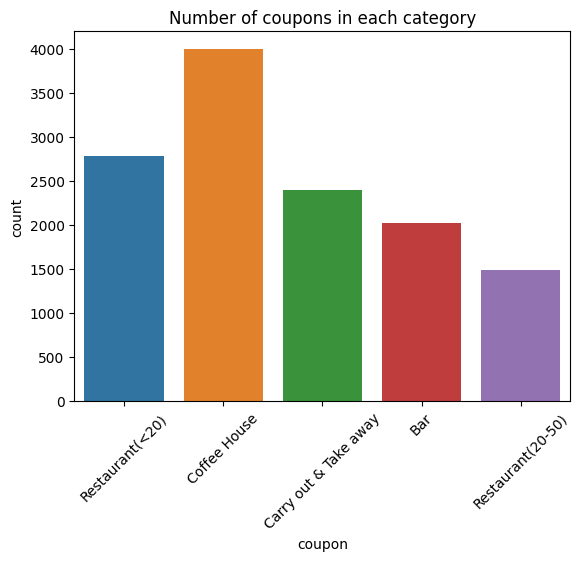

In [8]:
sns.countplot(data=data, x='coupon')
plt.title('Number of coupons in each category')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

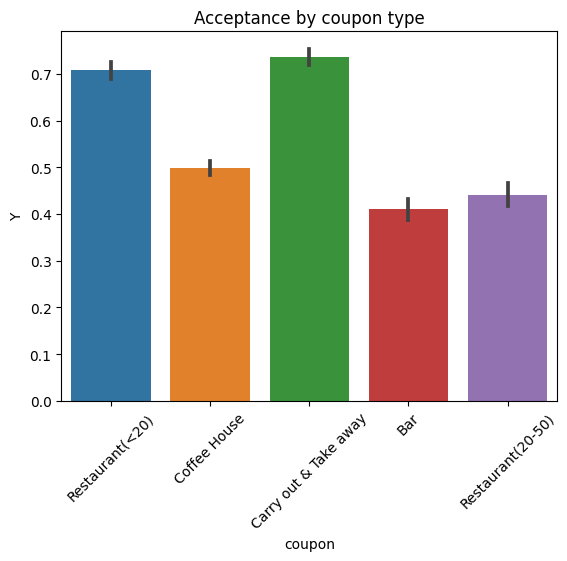

In [42]:
sns.barplot(data=data, x='coupon', y='Y')
plt.title('Acceptance by coupon type')
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

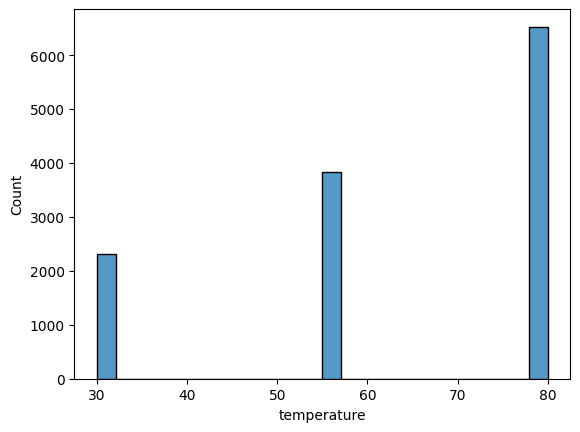

In [34]:
sns.histplot(data=data, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [8]:
barCouponData = data.query('coupon == "Bar"')
barCouponData.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [9]:
barCouponAcceptance = proportion_of_acceptance(barCouponData)
print(barCouponAcceptance)

0.41001487357461575


*41% of Bar coupon recipients accept the coupon*

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, 'less1'),
  Text(2, 0, '1~3'),
  Text(3, 0, 'gt8'),
  Text(4, 0, '4~8')])

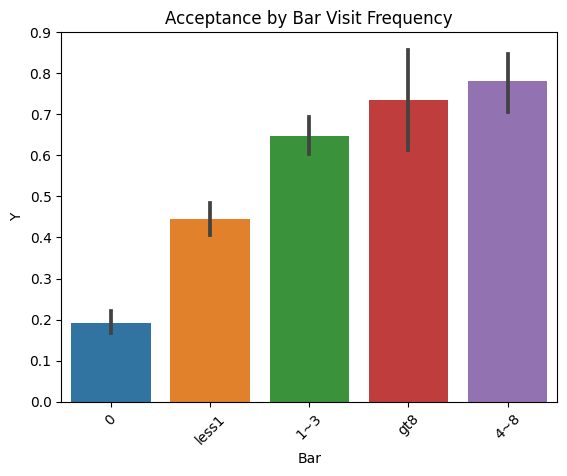

In [11]:
sns.barplot(data=barCouponData, x='Bar', y='Y')
plt.title('Acceptance by Bar Visit Frequency')
plt.xticks(rotation=45)

In [12]:
lessThan3Times = ['0', 'less1', '1~3']
moreThan3Times = ['gt8', '4~8']
acceptanceBarLessThan3 = proportion_of_acceptance(barCouponData.query('Bar in @lessThan3Times'))
acceptanceBarMoreThan3 = proportion_of_acceptance(barCouponData.query('Bar in @moreThan3Times'))
print(acceptanceBarLessThan3)
print(acceptanceBarMoreThan3)

0.37073707370737075
0.7688442211055276


*Only 37% of customers who go to a Bar less than 3 times tend to accept coupons, where as 76% of the customers who go to the Bar more frequently than 3 times accept a coupon.*

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Kid(s)'),
  Text(1, 0, 'Alone'),
  Text(2, 0, 'Friend(s)'),
  Text(3, 0, 'Partner')])

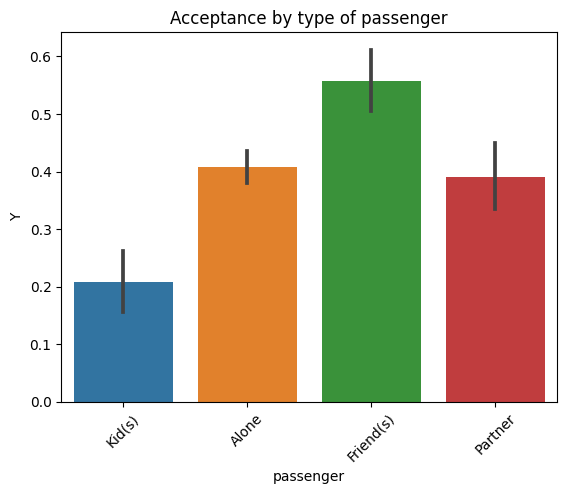

In [10]:
sns.barplot(data=barCouponData, x='passenger', y='Y')
plt.title('Acceptance by type of passenger')
plt.xticks(rotation=45)

In [22]:
moreThanOnce = ['gt8', '4~8', '1~3']
agesBelow25 = ['21', 'below21']
#Condition 0 - goes to bar more than once, age is over 25
qryCondition0 = 'Bar in @moreThanOnce and age not in @agesBelow25'
acceptanceCondition0 = proportion_of_acceptance(barCouponData.query(qryCondition0))
print(acceptanceCondition0)

acceptanceNotCondition0 = proportion_of_acceptance(barCouponData.query('~({})'.format(qryCondition0)))
print(acceptanceNotCondition0)


0.6952380952380952
0.33500313087038197


*The acceptance rate is 69.5% for drivers who go to a bar more than once a month and are over the age of 25, as compared to a 33.5% acceptance rate for others.*

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [23]:
moreThanOnce = ['gt8', '4~8', '1~3']
#Condition 1 - goes to bar more than once, no kid passengers, and not occupied in farming/fishing/forestry
qryCondition1 = 'Bar in @moreThanOnce and passenger != "Kid(s)" and occupation != "Farming Fishing & Forestry"'
acceptanceCondition1 = proportion_of_acceptance(barCouponData.query(qryCondition1))
print(acceptanceCondition1)

acceptanceNotCondition1 = proportion_of_acceptance(barCouponData.query('~({})'.format(qryCondition1)))
print(acceptanceNotCondition1)

0.7132486388384754
0.296043656207367


*Interestingly, the acceptance rate of drivers "who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry" is 69.5% and is exactly same as the group of drivers "who go to a bar more than once a month and are over the age of 25".*

*30% of others accept the coupon.*

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [26]:
moreThanOnce = ['gt8', '4~8', '1~3']
ages30Under = ['21', 'below21', '26']
restaurantGt4 = ['4-8', 'gt8']
incomeLessThan50K = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

#Condition 2 - goes to bar more than once, no kid passengers, not widowed
qryCondition2 = 'Bar in @moreThanOnce and passenger != "Kid(s)" and maritalStatus != "Widowed"'

#Condition 3 - goes to bar more than once, age less than 30
qryCondition3 = 'Bar in @moreThanOnce and age not in @ages30Under'

#Condition 4 - goes to restaurants less than 20, more than 4 times, income < 50K
qryCondition4 = 'RestaurantLessThan20 in @restaurantGt4 and income in @incomeLessThan50K'

qryCondition2or3or4 = '({}) or ({}) or ({})'.format(qryCondition2, qryCondition3, qryCondition4)

acceptanceCondition2 = proportion_of_acceptance(barCouponData.query(qryCondition2))
print(acceptanceCondition2)

acceptanceCondition3 = proportion_of_acceptance(barCouponData.query(qryCondition3))
print(acceptanceCondition3)

acceptanceCondition4 = proportion_of_acceptance(barCouponData.query(qryCondition4))
print(acceptanceCondition4)

acceptanceCondition2or3or4 = proportion_of_acceptance(barCouponData.query(qryCondition2or3or4))
print(acceptanceCondition2or3or4)

0.7132486388384754
0.6414342629482072
0.59375
0.6615384615384615


*Acceptance rate among drivers who go to the bar more than once a month, do not have kid passengers and are not widowed was 71%*

*Acceptance rate among drivers who go to the bar more than once a month and are aged less than 30 was 64%*

*Acceptance rate among drivers who go to cheap restaurants and have income less than 50K was 59%*

*Acceptance among drivers who fall into any of these criteria was at 66%.*

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

*The hypothesis would be that drivers of a younger age who already go to the bar more than once a month are more likely to accept the coupons. It can also be noticed that drivers who tend to go to the bar more often (e.g. greater than 3 times) are more likely to accept the coupon. Another hypothesis is that having kids in the car is a strong deterrent for coupon acceptance.*

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  